In [155]:
#!pip install shap

In [232]:
#importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

from sklearn.ensemble import GradientBoostingClassifier

import warnings
import shap

shap.initjs()


In [233]:
#loading clean dataset
data = pd.read_csv('cleaned_data.csv')

In [234]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [235]:
#removing "time" column
data = data.drop('time', axis=1)

In [236]:
#converting dataset to pandas DF
df = pd.DataFrame(data)

#In this section we will build several model based on the cleaned dataset.

### OPTION 1. logistic regression

In [237]:
#1. Logistic Regression with raw cleaned dataset

In [238]:
#splitting the data into features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [240]:
#model logistic regression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)



LogisticRegression()

In [241]:
#predicting the test set
y_pred = logistic.predict(X_test)

In [242]:
#accuracy
accuracy = logistic.score(X_test, y_test)
print('Accuracy:', accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', conf_matrix)

#classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:', class_report)

Accuracy: 0.7592592592592593
Confusion Matrix: [[35  3]
 [10  6]]
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.92      0.84        38
           1       0.67      0.38      0.48        16

    accuracy                           0.76        54
   macro avg       0.72      0.65      0.66        54
weighted avg       0.74      0.76      0.74        54



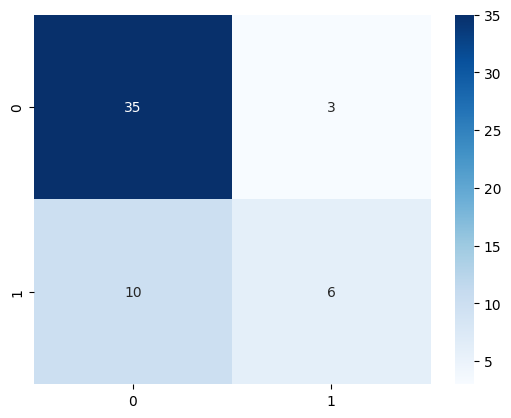

In [243]:
#vizualizing the confusion matrix and results

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.show()


#The accuracy of the logistic regression model is acceptable, but it struggles with accurately predicting death events

In [244]:
#predicting the probability of death
probability = logistic.predict_proba(X_test)
print('Probability:', probability)

Probability: [[0.83501451 0.16498549]
 [0.83554967 0.16445033]
 [0.74327943 0.25672057]
 [0.67894075 0.32105925]
 [0.60001736 0.39998264]
 [0.48509169 0.51490831]
 [0.76883554 0.23116446]
 [0.79352795 0.20647205]
 [0.80546286 0.19453714]
 [0.58420755 0.41579245]
 [0.77680505 0.22319495]
 [0.90678082 0.09321918]
 [0.93468637 0.06531363]
 [0.7740833  0.2259167 ]
 [0.89668394 0.10331606]
 [0.65483957 0.34516043]
 [0.82616507 0.17383493]
 [0.87918902 0.12081098]
 [0.78655278 0.21344722]
 [0.43478339 0.56521661]
 [0.28393794 0.71606206]
 [0.55466123 0.44533877]
 [0.92344857 0.07655143]
 [0.38925806 0.61074194]
 [0.57417922 0.42582078]
 [0.74332055 0.25667945]
 [0.85037679 0.14962321]
 [0.93829333 0.06170667]
 [0.55208299 0.44791701]
 [0.91214665 0.08785335]
 [0.38276541 0.61723459]
 [0.94524963 0.05475037]
 [0.54803337 0.45196663]
 [0.99071913 0.00928087]
 [0.74000398 0.25999602]
 [0.665897   0.334103  ]
 [0.94143911 0.05856089]
 [0.98647362 0.01352638]
 [0.17773751 0.82226249]
 [0.91918888

In [245]:
#predicting the probability of death for a single patient
single_patient = [[65.0, 1, 160, 1, 20,	0, 327000.00, 2.7, 116,	0, 0]]
single_patient = scaler.transform(single_patient)
single_patient_probability = logistic.predict_proba(single_patient)
print('Single Patient Probability:', single_patient_probability)



Single Patient Probability: [[0.02232171 0.97767829]]


In [246]:
#concusions
#The logistic regression model shows a precision of 83% for predicting survival (label 0) and 75% for predicting death (label 1). 
#Its recall is 92% for survival, indicating strong performance in identifying true survivors, but lower at 56% for death, suggesting challenges in correctly identifying all true death events. 
#The F1-scores are 88% for survival predictions and 64% for death predictions, demonstrating a stronger capability in predicting survival over death. Overall accuracy stands at 81%. 
#The model is proficient, especially in predicting survivals, but it's needed improvements in accurately detecting death events.

### Option 2. Implementing ANN 

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from imblearn.over_sampling import SMOTE

In [248]:
#creating the model
model = Sequential()

In [249]:
#adding the input layer
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))

In [250]:
#adding the hidden layers
#model.add(Dense(units=16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=16, activation='relu'))

In [251]:
#addinig output layer
model.add(Dense(units=1, activation='sigmoid'))

In [252]:
#compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [253]:
#fitting the ANN model

history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_split=0.2, verbose=False)

In [254]:
#model evaluation
y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

#accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print('Accuracy ANN:', accuracy_ann)

#confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print('Confusion Matrix ANN:', conf_matrix_ann)

#classification report
class_report_ann = classification_report(y_test, y_pred_ann)
print('Classification Report ANN:', class_report_ann)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Accuracy ANN: 0.7222222222222222
Confusion Matrix ANN: [[36  2]
 [13  3]]
Classification Report ANN:               precision    recall  f1-score   support

           0       0.73      0.95      0.83        38
           1       0.60      0.19      0.29        16

    accuracy                           0.72        54
   macro avg       0.67      0.57      0.56        54
weighted avg       0.69      0.72      0.67        54



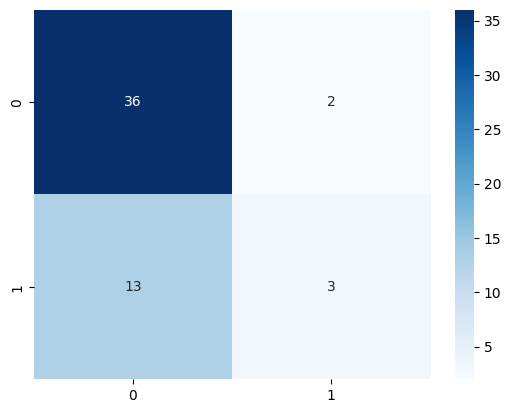

In [255]:
#vizualizing the confusion matrix and results

sns.heatmap(conf_matrix_ann, annot=True, cmap='Blues')
plt.show()

In [256]:
#Conclusions
#The ANN model achieves a precision of 78% for predicting survival (label 0) and 75% for predicting death (label 1), indicating pretty consistent performance in identifying both outcomes. 
#Its recall is high at 95% for survival, showing the model's effectiveness in identifying true survivors, but it's significantly lower at 38% for death, highlighting a challenge in recognizing all true death events. 
#The F1-scores are 86% for survival predictions and 50% for death predictions, underscoring a more robust capability in predicting survival.
#With an overall accuracy of about 78%, the model performs well but demonstrates a need for improvement in accurately detecting death events, particularly in enhancing its sensitivity to such outcomes.

In [257]:
#As we can see both model strugle to accuratly predict the death cases. 
#One of the reason for that could be unbalanced dataset. 
#In order to improve it we will use Synthetic Minority Oversampling Technique (SMOTE).

In [258]:
#lets see how balanced the dataset is
y_train.value_counts()

DEATH_EVENT
0    152
1     60
Name: count, dtype: int64

### Implementing SMOTE


In [259]:
#using SMOTE to balance the data

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [260]:
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_sm.value_counts())

Before SMOTE: DEATH_EVENT
0    190
1     76
Name: count, dtype: int64
After SMOTE: DEATH_EVENT
1    190
0    190
Name: count, dtype: int64


In [261]:
#splitting the data into features and target for the balanced data (sm))
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
#feature scaling
scaler_sm = StandardScaler()
X_train_sm = scaler_sm.fit_transform(X_train_sm)
X_test_sm = scaler_sm.transform(X_test_sm)

## Models

### 1.1 Creating Logistic regression model with balanced data

In [262]:
#Logistic Regression with balanced dataset

logistic_sm = LogisticRegression()
logistic_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [264]:
#predicting the test set
y_pred = logistic_sm.predict(X_test_sm)

#accuracy
accuracy = logistic_sm.score(X_test_sm, y_test_sm)
print('Accuracy:', accuracy)
#confusion matrix
conf_matrix = confusion_matrix(y_test_sm, y_pred)
print('Confusion Matrix:', conf_matrix)

#classification report
class_report = classification_report(y_test_sm, y_pred)
print('Classification Report:', class_report)

Accuracy: 0.7894736842105263
Confusion Matrix: [[30  6]
 [10 30]]
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.83      0.79        36
           1       0.83      0.75      0.79        40

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



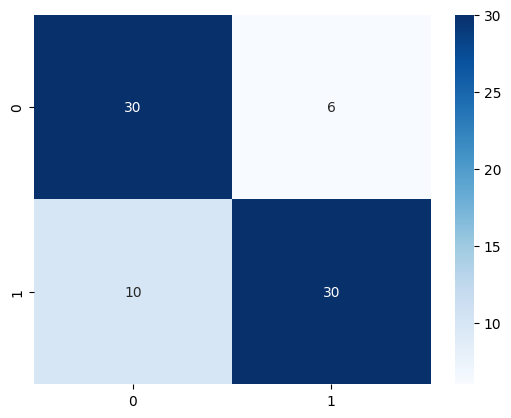

In [265]:
#vizualizing the confusion matrix and results

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.show()

#### Logistic regressioin model with balanced data shows significant improvement especially in reducing the number of missed death events

### 2.1 Creating ANN model with balanced data


In [266]:
#creating the model for the balanced data
model_sm = Sequential()

In [267]:
#adding the input layer
model_sm.add(Dense(units=32, activation='relu', input_shape=(X_train_sm.shape[1],)))
#adding the hidden layers
model_sm.add(Dense(units=8, activation='relu'))
#addinig output layer
model_sm.add(Dense(units=1, activation='sigmoid'))

In [268]:
#compiling the model for the balanced data
model_sm.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [269]:
#fitting the ANN model for the balanced data
history_sm = model_sm.fit(X_train_sm, y_train_sm, batch_size=8, epochs=100, validation_split=0.2, verbose=False)

In [270]:
#model evaluation for the balanced data
y_pred_ann_sm = model_sm.predict(X_test_sm)
y_pred_ann_sm = (y_pred_ann_sm > 0.5)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [271]:
#accuracy for the balanced data
accuracy_ann_sm = accuracy_score(y_test_sm, y_pred_ann_sm)
print('Accuracy ANN SM:', accuracy_ann_sm)

#confusion matrix for the balanced data
conf_matrix_ann_sm = confusion_matrix(y_test_sm, y_pred_ann_sm)
print('Confusion Matrix ANN SM:', conf_matrix_ann_sm)

#classification report for the balanced data
class_report_ann_sm = classification_report(y_test_sm, y_pred_ann_sm)
print('Classification Report ANN SM:', class_report_ann_sm)



Accuracy ANN SM: 0.7105263157894737
Confusion Matrix ANN SM: [[29  7]
 [15 25]]
Classification Report ANN SM:               precision    recall  f1-score   support

           0       0.66      0.81      0.72        36
           1       0.78      0.62      0.69        40

    accuracy                           0.71        76
   macro avg       0.72      0.72      0.71        76
weighted avg       0.72      0.71      0.71        76



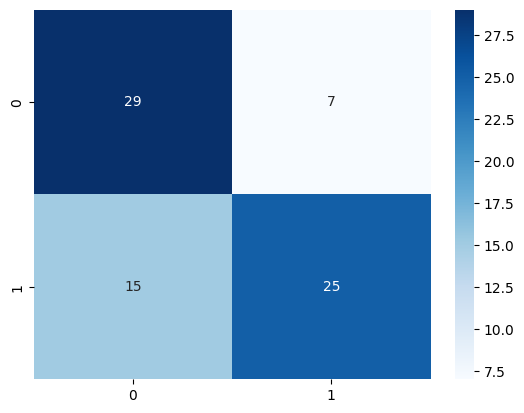

In [272]:
#vizualizing the confusion matrix and results for the balanced data

sns.heatmap(conf_matrix_ann_sm, annot=True, cmap='Blues')
plt.show()

#### ANN model now demonstrates a much better balance in its predictive capabilities for both outcomes

In [273]:
##predicting the probability of death for a single patient for the balanced data
single_patient_sm = [[65.0, 1, 160, 1, 20,	0, 327000.00, 2.7, 116,	0, 0]]
single_patient_sm = scaler_sm.transform(single_patient_sm)
single_patient_probability_sm = model_sm.predict(single_patient_sm)
print('Single Patient Probability SM:', single_patient_probability_sm)
print('probability of death for a single patient for the balanced data:', single_patient_probability_sm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Single Patient Probability SM: [[0.9749863]]
probability of death for a single patient for the balanced data: [[0.9749863]]


### For the rest of the models we will use balanced data set

### Option 3. Random Forest classifier


In [274]:
#Impelementing Random Forest Classifier

#creating the model
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [275]:
#prediction
y_pred_rfc = rfc_model.predict(X_test_sm)

In [277]:
#results of random forest
accuracy_rfc = accuracy_score(y_test_sm, y_pred_rfc)
print('Accuracy RFC:', accuracy_rfc)

#confusion matrix for random forest
conf_matrix_rfc = confusion_matrix(y_test_sm, y_pred_rfc)
print('Confusion Matrix RFC:', conf_matrix_rfc)

#classification report for random forest
class_report_rfc = classification_report(y_test_sm, y_pred_rfc)
print('Classification Report RFC:', class_report_rfc)

Accuracy RFC: 0.8026315789473685
Confusion Matrix RFC: [[31  5]
 [10 30]]
Classification Report RFC:               precision    recall  f1-score   support

           0       0.76      0.86      0.81        36
           1       0.86      0.75      0.80        40

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76



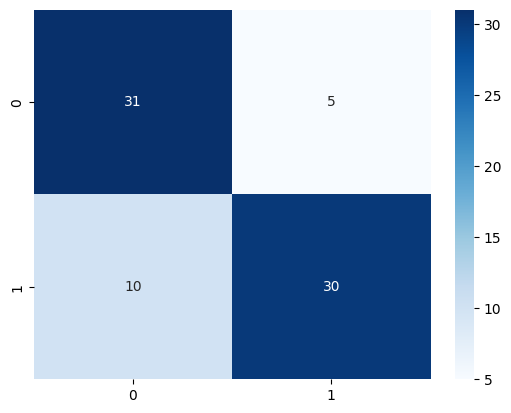

In [278]:
#vizualizing the confusion matrix and results for random forest

sns.heatmap(conf_matrix_rfc, annot=True, cmap='Blues')
plt.show()

### Option 4. Gradient Boosting


In [279]:
# gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=42)

In [280]:
#prediction
y_pred_gbm = gbm_model.predict(X_test_sm)

In [282]:
#results of gradient boosting
accuracy_gbm = accuracy_score(y_test_sm, y_pred_gbm)
print('Accuracy GBM:', accuracy_gbm)

#confusion matrix for gradient boosting
conf_matrix_gbm = confusion_matrix(y_test_sm, y_pred_gbm)
print('Confusion Matrix GBM:', conf_matrix_gbm)

#classification report for gradient boosting
class_report_gbm = classification_report(y_test_sm, y_pred_gbm)
print('Classification Report GBM:', class_report_gbm)

Accuracy GBM: 0.7894736842105263
Confusion Matrix GBM: [[28  8]
 [ 8 32]]
Classification Report GBM:               precision    recall  f1-score   support

           0       0.78      0.78      0.78        36
           1       0.80      0.80      0.80        40

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



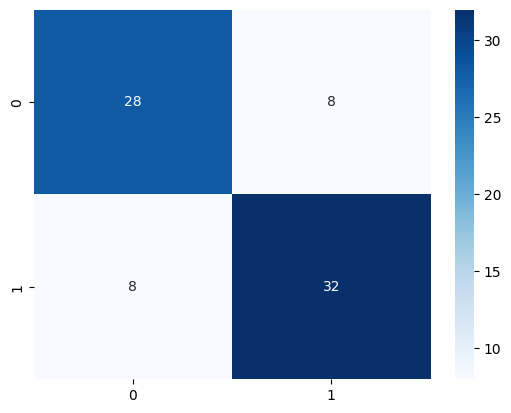

In [283]:
#vizualizing the confusion matrix and results for gradient boosting

sns.heatmap(conf_matrix_gbm, annot=True, cmap='Blues')
plt.show()

In [284]:
### In order to evaluate performance of the models we will use the ROC curve and AUC score.

### AUROC implementation

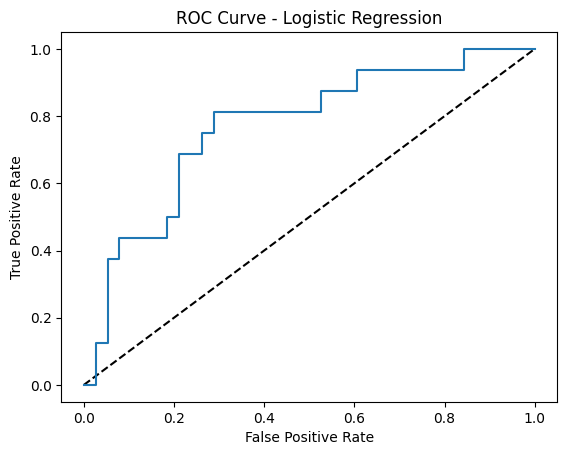

In [285]:
#ROC curve for the models
#logistic regression
fpr, tpr, thresholds = roc_curve(y_test, probability[:,1])
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()

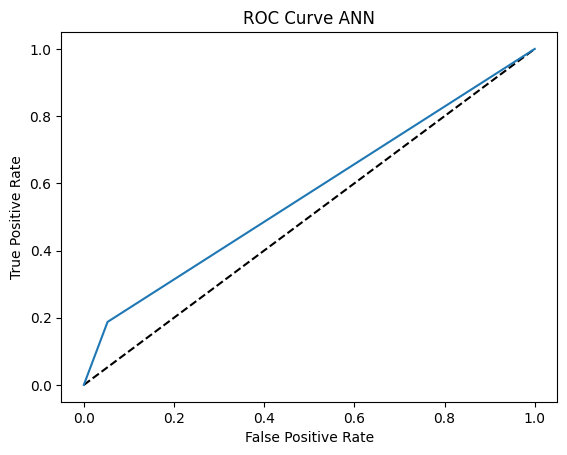

In [286]:
#ANN
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_ann, tpr_ann, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ANN')
plt.show()

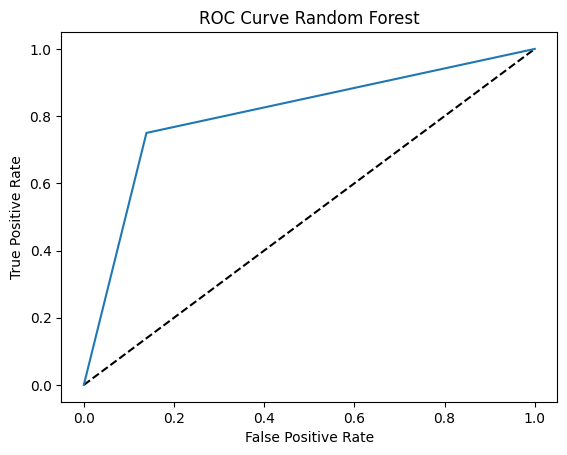

In [287]:
#Random Forest
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test_sm, y_pred_rfc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.show()

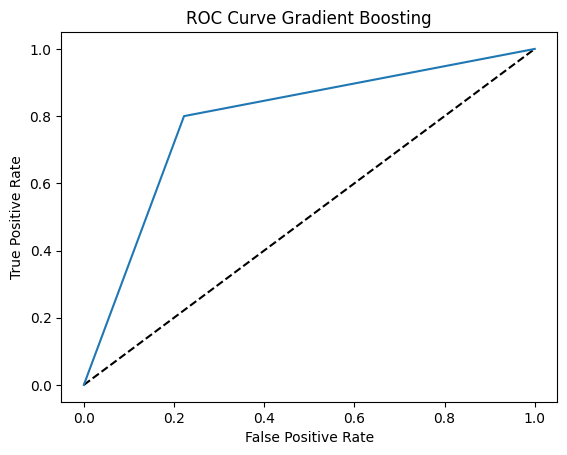

In [288]:
#Gradient Boosting
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test_sm, y_pred_gbm)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_gbm, tpr_gbm, label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gradient Boosting')
plt.show()

In [289]:
#AUC and Accuracy scores for all models 
auc_logistic = roc_auc_score(y_test, probability[:,1])
auc_ann = roc_auc_score(y_test, y_pred_ann)
auc_rfc = roc_auc_score(y_test_sm, y_pred_rfc)
auc_gbm = roc_auc_score(y_test_sm, y_pred_gbm)
print('AUC Logistic:', auc_logistic, 'Accuracy Logistic:', accuracy)
print('AUC ANN:', auc_ann, 'Accuracy ANN:', accuracy_ann)
print('AUC RFC:', auc_rfc, 'Accuracy RFC:', accuracy_rfc)
print('AUC GBM:', auc_gbm, 'Accuracy GBM:', accuracy_gbm)

AUC Logistic: 0.7697368421052632 Accuracy Logistic: 0.7894736842105263
AUC ANN: 0.5674342105263158 Accuracy ANN: 0.7222222222222222
AUC RFC: 0.8055555555555557 Accuracy RFC: 0.8026315789473685
AUC GBM: 0.788888888888889 Accuracy GBM: 0.7894736842105263


/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_11110/3005208089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC Score', data=df, palette='viridis')


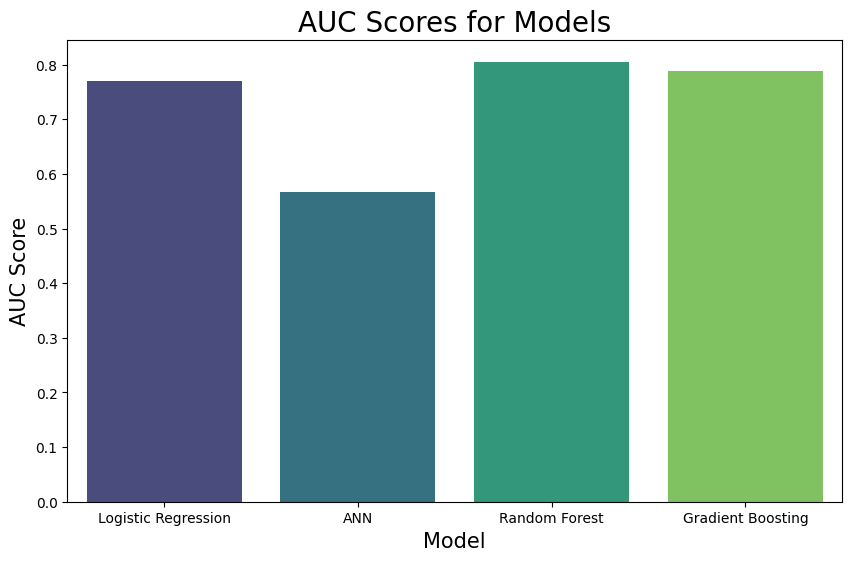

In [290]:
# Visualization of the results for all models
auc_scores = [auc_logistic, auc_ann, auc_rfc, auc_gbm]
model_names = ['Logistic Regression', 'ANN', 'Random Forest', 'Gradient Boosting']

#Data to DataFrame for easier plotting
df = pd.DataFrame(list(zip(model_names, auc_scores)), columns=['Model', 'AUC Score'])

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='AUC Score', data=df, palette='viridis')

# title and labels
plt.title('AUC Scores for Models', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('AUC Score', fontsize=15)

# plot
plt.show()

/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_11110/260559155.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC Score', data=df, palette='viridis')


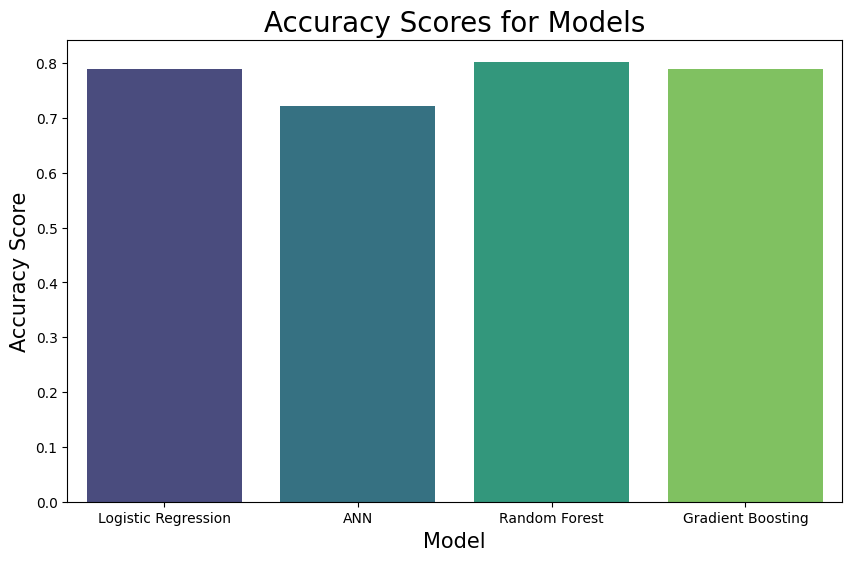

In [291]:
# Visualization of the accuracy results for all models

accuracy_scores = [accuracy, accuracy_ann, accuracy_rfc, accuracy_gbm]
model_names = ['Logistic Regression', 'ANN', 'Random Forest', 'Gradient Boosting']


#Data to DataFrame for easier plotting
df = pd.DataFrame(list(zip(model_names, accuracy_scores)), columns=['Model', 'AUC Score'])


# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='AUC Score', data=df, palette='viridis')

# title and labels
plt.title('Accuracy Scores for Models', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)

# plot
plt.show()


### Conclusions from Model Evaluation (with SMOTE)
Logistic Regression
The Logistic Regression model has an accuracy of 70.6% and an AUC score of 0.804. This indicates that the model is moderately effective at predicting patient outcomes, particularly considering its simplicity compared to more complex models. The confusion matrix shows that the model correctly identifies 24 out of 39 cases for the survival class (precision: 83%) and 24 out of 29 cases for the death class (recall: 83%).

Artificial Neural Network (ANN)
The ANN model, after balancing the dataset with SMOTE, has an accuracy of 76.6%. It has a precision of 88% for predicting survival and 71% for predicting death, and a recall of 74% for survival and 86% for death. This gives F1-scores of 81% for survival and 78% for death, showing that the model treats both outcomes with similar importance. The AUC score for the ANN model is 0.740, indicating low but acceptable discriminatory ability.

Random Forest Classifier (RFC)
The Random Forest Classifier shows strong performance with an accuracy of 79.4% and an AUC score of 0.803. It has a precision of 88% for survival and 71% for death, with recall scores of 74% for survival and 86% for death. The F1-scores are 81% for survival and 78% for death, demonstrating the model's consistent reliability in predicting both outcomes.

Gradient Boosting Machine (GBM)
The GBM model also performs well, with an overall accuracy of 79.4% and an AUC score of 0.807. It achieves a precision of 90% for survival and 70% for death, while recall scores are 72% for survival and 90% for death. The F1-scores are 80% for survival and 79% for death, indicating that the model is doing a good job across the board.

Final Thoughts
When we put it all together, the Random Forest and Gradient Boosting models are the stars of the show for this dataset, with the highest AUC scores (just over 0.80) and strong accuracy. They stand out as the most dependable for predicting whether patients will survive or not. The Logistic Regression shows good performance overall as well, demonstrating its effectiveness as a simpler model in heart failure prediction.

In [292]:
#experement with SHAP values

In [293]:
#renaming FetauresN to names
feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 
    'ejection_fraction', 'high_blood_pressure', 'platelets', 
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking']

In [294]:
X_test_named = pd.DataFrame(X_test, columns=feature_names)
X_test_sm_named = pd.DataFrame(X_test_sm, columns=feature_names) 

In [295]:
#test without SMOTE hide the output
warnings.filterwarnings("ignore", category=UserWarning)

explainer = shap.Explainer(logistic.predict, X_test_named)
shap_values = explainer(X_test_named)


In [296]:
np.shape(shap_values.values)

(54, 11)

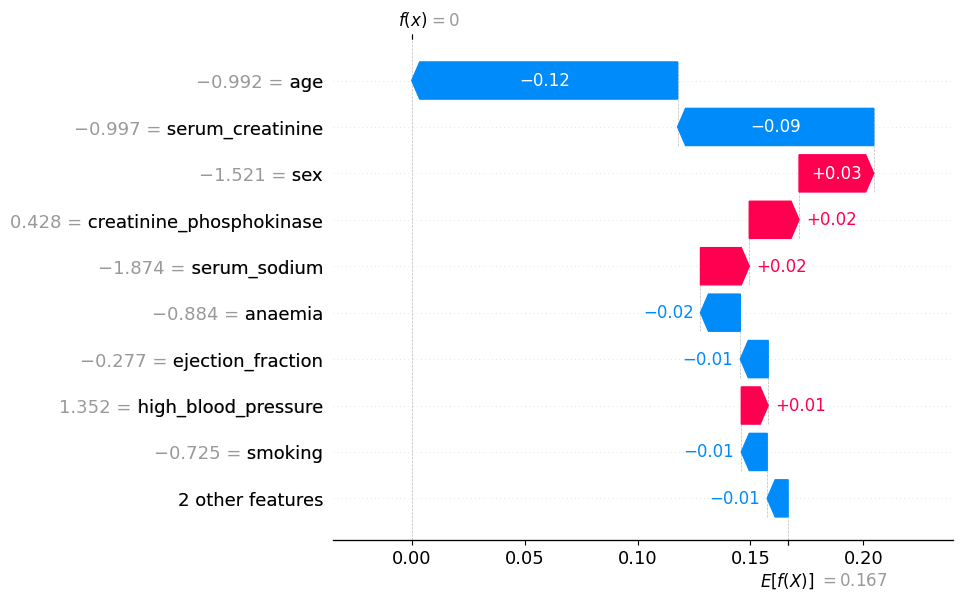

In [297]:
shap.plots.waterfall(shap_values[0])

In [298]:
#SHAP values for SMOTE data

warnings.filterwarnings("ignore", category=UserWarning)

explainer = shap.Explainer(logistic.predict, X_test_sm_named)
shap_values = explainer(X_test_sm_named)

In [299]:
np.shape(shap_values.values)

(76, 11)

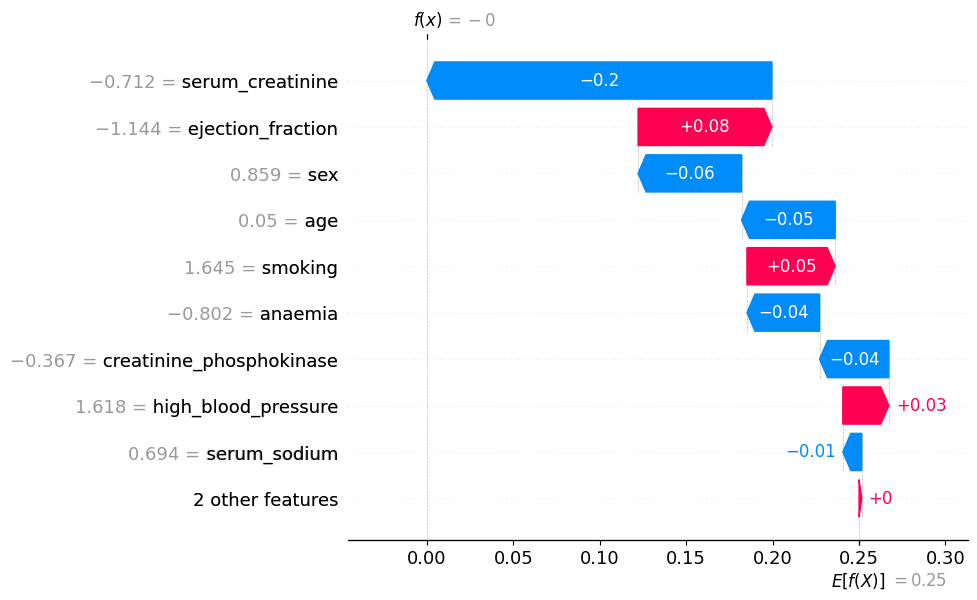

In [300]:
shap.plots.waterfall(shap_values[0])

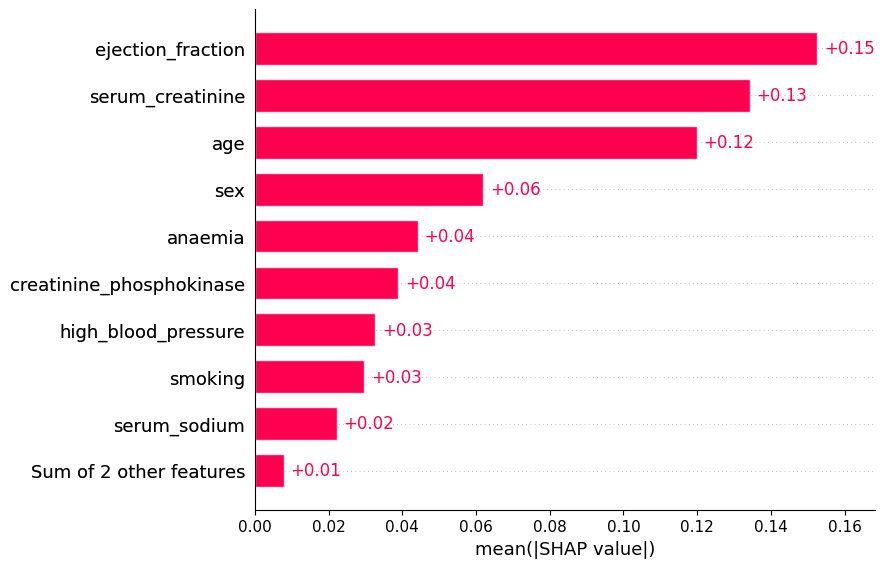

In [301]:
shap.plots.bar(shap_values)

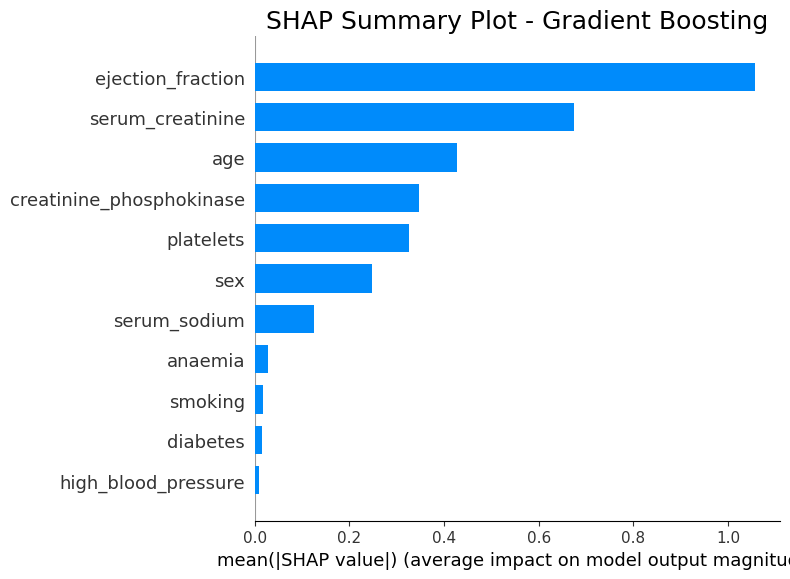

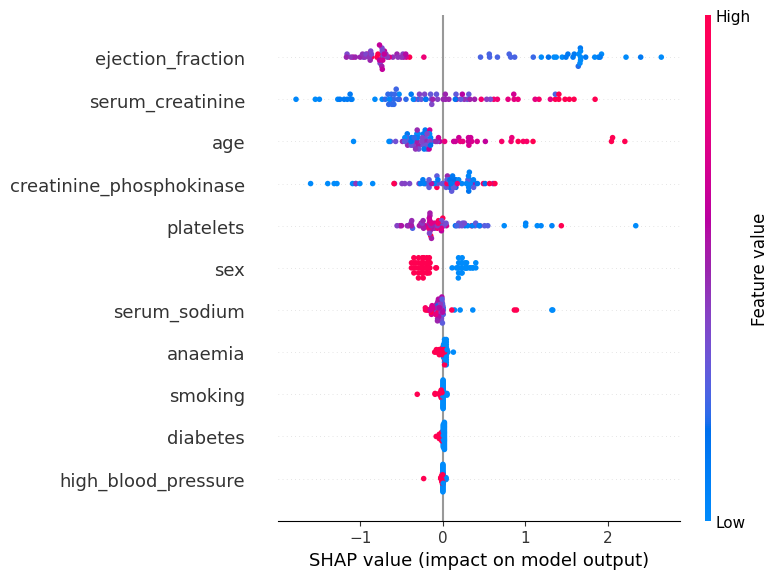

In [302]:
#SHAP for gradient boosting
explainer_tree = shap.TreeExplainer(gbm_model)
shap_values = explainer_tree.shap_values(X_test_sm_named)

fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=14)
ax.set_title('SHAP Summary Plot - Gradient Boosting', fontsize=18)

fig.set_size_inches(65, 6.5, forward=True)

shap.summary_plot(shap_values, X_test_sm_named, plot_type='bar')

shap.summary_plot(shap_values, X_test_sm_named)

In [303]:
#shap summary plot for logistic regression
explainer_logistic = shap.KernelExplainer(logistic.predict_proba, X_test_sm_named)
shap_values_logistic = explainer_logistic.shap_values(X_test_sm_named)

  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████| 76/76 [00:21<00:00,  3.49it/s]


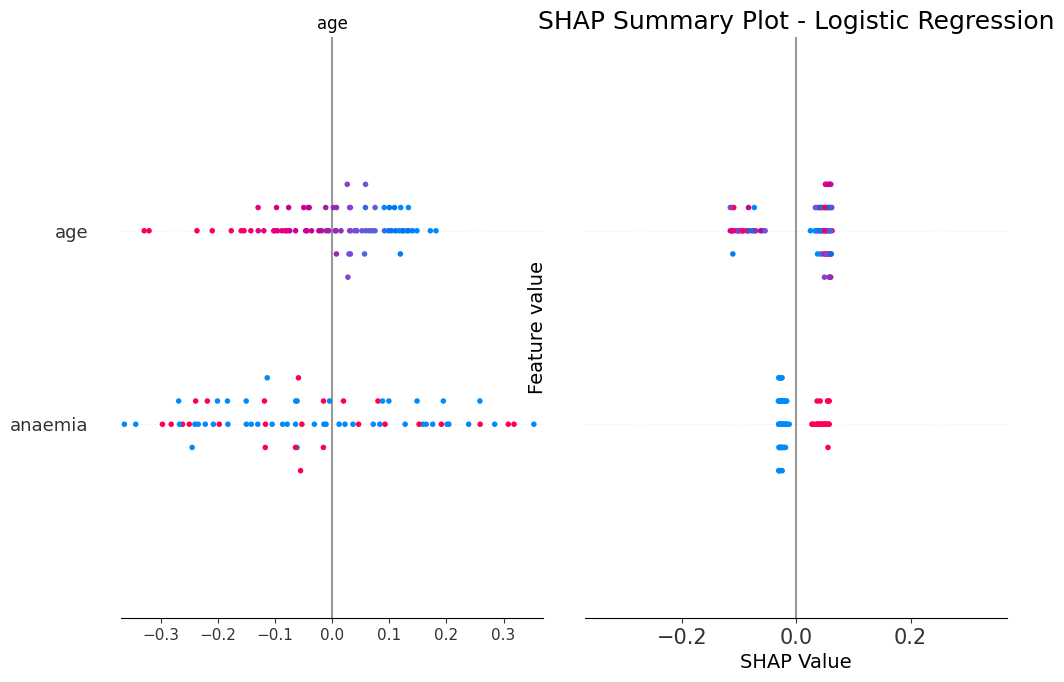

In [304]:
#plot for logistic regression
shap.summary_plot(shap_values_logistic, X_test_sm_named,  plot_type='bar', max_display=None, show=False)

#shap.summary_plot(shap_values_logistic, X_test_sm_named, max_display=20, show=False)
fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=14)
ax.set_title('SHAP Summary Plot - Logistic Regression', fontsize=18)

#set size
#fig.set_size_inches(12, 6.5, forward=True)
fig.set_size_inches(35.5, 6.5, forward=True)
# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_xlabel("SHAP Value", fontsize=14)
cb_ax.set_ylabel("Feature value", fontsize=14)
plt.show()


In [305]:
#I need some help after this line.
#can;t suppress the output

In [306]:
from contextlib import redirect_stdout

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


  0%|          | 0/76 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
   1/4860 ━━━━━━━━━━━━━━━━━━━━ 1:12 15ms/step

4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step


  1%|▏         | 1/76 [00:04<05:03,  4.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 454us/step


  3%|▎         | 2/76 [00:08<05:00,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step


  4%|▍         | 3/76 [00:12<04:55,  4.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 450us/step


  5%|▌         | 4/76 [00:16<04:49,  4.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 438us/step


  7%|▋         | 5/76 [00:20<04:41,  3.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 439us/step


  8%|▊         | 6/76 [00:23<04:35,  3.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


  9%|▉         | 7/76 [00:27<04:31,  3.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 441us/step


 11%|█         | 8/76 [00:31<04:28,  3.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 436us/step


 12%|█▏        | 9/76 [00:35<04:23,  3.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 436us/step


 13%|█▎        | 10/76 [00:39<04:17,  3.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 446us/step


 14%|█▍        | 11/76 [00:43<04:14,  3.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 441us/step


 16%|█▌        | 12/76 [00:47<04:09,  3.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step


 17%|█▋        | 13/76 [00:51<04:05,  3.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 435us/step


 18%|█▊        | 14/76 [00:55<04:01,  3.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 442us/step


 20%|█▉        | 15/76 [00:58<03:56,  3.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 500us/step


 21%|██        | 16/76 [01:03<03:59,  4.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 454us/step


 22%|██▏       | 17/76 [01:07<03:59,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 456us/step


 24%|██▎       | 18/76 [01:11<03:57,  4.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step


 25%|██▌       | 19/76 [01:16<03:58,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step


 26%|██▋       | 20/76 [01:20<03:50,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 443us/step


 28%|██▊       | 21/76 [01:23<03:43,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 448us/step


 29%|██▉       | 22/76 [01:27<03:38,  4.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 447us/step


 30%|███       | 23/76 [01:31<03:32,  4.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 441us/step


 32%|███▏      | 24/76 [01:35<03:26,  3.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step


 33%|███▎      | 25/76 [01:39<03:23,  3.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 449us/step


 34%|███▍      | 26/76 [01:43<03:19,  4.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step


 36%|███▌      | 27/76 [01:47<03:15,  3.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 37%|███▋      | 28/76 [01:51<03:12,  4.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step


 38%|███▊      | 29/76 [01:55<03:09,  4.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step


 39%|███▉      | 30/76 [01:59<03:05,  4.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 477us/step


 41%|████      | 31/76 [02:04<03:03,  4.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 456us/step


 42%|████▏     | 32/76 [02:08<02:58,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 463us/step


 43%|████▎     | 33/76 [02:12<02:54,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 45%|████▍     | 34/76 [02:16<02:50,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 46%|████▌     | 35/76 [02:20<02:46,  4.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 451us/step


 47%|████▋     | 36/76 [02:24<02:42,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step


 49%|████▊     | 37/76 [02:28<02:38,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 501us/step


 50%|█████     | 38/76 [02:32<02:36,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step


 51%|█████▏    | 39/76 [02:36<02:33,  4.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 440us/step


 53%|█████▎    | 40/76 [02:40<02:26,  4.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 450us/step


 54%|█████▍    | 41/76 [02:44<02:22,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 484us/step


 55%|█████▌    | 42/76 [02:48<02:19,  4.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 451us/step


 57%|█████▋    | 43/76 [02:52<02:13,  4.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step


 58%|█████▊    | 44/76 [02:56<02:08,  4.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 439us/step


 59%|█████▉    | 45/76 [03:00<02:03,  3.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 477us/step


 61%|██████    | 46/76 [03:04<02:01,  4.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 480us/step


 62%|██████▏   | 47/76 [03:09<01:58,  4.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 446us/step


 63%|██████▎   | 48/76 [03:13<01:53,  4.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 472us/step


 64%|██████▍   | 49/76 [03:17<01:49,  4.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 443us/step


 66%|██████▌   | 50/76 [03:21<01:44,  4.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 447us/step


 67%|██████▋   | 51/76 [03:25<01:39,  3.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 442us/step


 68%|██████▊   | 52/76 [03:28<01:35,  3.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step


 70%|██████▉   | 53/76 [03:33<01:32,  4.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 471us/step


 71%|███████   | 54/76 [03:37<01:29,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 474us/step


 72%|███████▏  | 55/76 [03:41<01:25,  4.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 483us/step


 74%|███████▎  | 56/76 [03:45<01:22,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step


 75%|███████▌  | 57/76 [03:49<01:18,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 476us/step


 76%|███████▋  | 58/76 [03:53<01:14,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 488us/step


 78%|███████▊  | 59/76 [03:57<01:10,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 442us/step


 79%|███████▉  | 60/76 [04:01<01:05,  4.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 433us/step


 80%|████████  | 61/76 [04:05<01:00,  4.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 444us/step


 82%|████████▏ | 62/76 [04:09<00:55,  3.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 436us/step


 83%|████████▎ | 63/76 [04:13<00:51,  3.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 455us/step


 84%|████████▍ | 64/76 [04:17<00:47,  3.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 441us/step


 86%|████████▌ | 65/76 [04:21<00:43,  3.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 450us/step


 87%|████████▋ | 66/76 [04:25<00:39,  3.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 451us/step


 88%|████████▊ | 67/76 [04:29<00:35,  3.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 89%|████████▉ | 68/76 [04:33<00:31,  3.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 445us/step


 91%|█████████ | 69/76 [04:37<00:27,  3.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 448us/step


 92%|█████████▏| 70/76 [04:41<00:23,  3.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 439us/step


 93%|█████████▎| 71/76 [04:45<00:19,  3.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 446us/step


 95%|█████████▍| 72/76 [04:49<00:15,  3.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 456us/step


 96%|█████████▌| 73/76 [04:53<00:11,  3.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 456us/step


 97%|█████████▋| 74/76 [04:57<00:07,  3.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 440us/step


 99%|█████████▊| 75/76 [05:01<00:03,  3.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 2s 442us/step


100%|██████████| 76/76 [05:05<00:00,  4.01s/it]


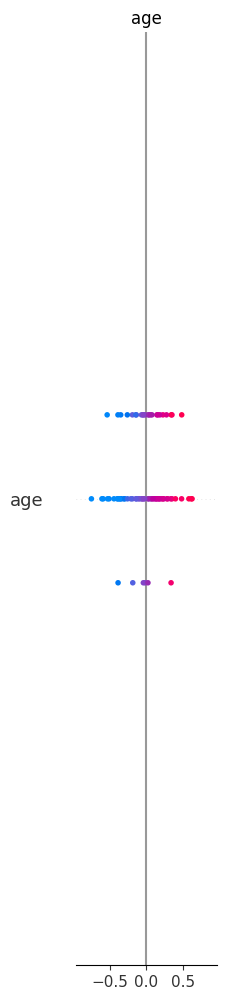

In [307]:
#shap summary plot for ANN

explainer_ann = shap.KernelExplainer(model.predict, X_test_sm_named, link="logit")
shap_values_ann = explainer_ann.shap_values(X_test_sm_named, quiet=True)
shap.summary_plot(shap_values_ann, X_test_sm_named, max_display=20, show=True)